In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans

In [2]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [3]:
df=pd.read_csv('Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.shape

(200, 5)

In [8]:
# to check for null values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
q1=41.50
q3=78
iqr=q3-q1
lf=q1-(1.5*iqr)
hf=q3+(1.5*iqr)
print(f'lower fence {lf} \n upper fence {hf}')
l1=[]
for i in df['Annual Income (k$)']:
    if i in range(-1,132):
        l1.append(i)
print(len(l1))
    

lower fence -13.25 
 upper fence 132.75
198


In [10]:
df=df.drop('CustomerID',axis=1)

In [11]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [12]:
df.values

array([['Male', 19, 15, 39],
       ['Male', 21, 15, 81],
       ['Female', 20, 16, 6],
       ['Female', 23, 16, 77],
       ['Female', 31, 17, 40],
       ['Female', 22, 17, 76],
       ['Female', 35, 18, 6],
       ['Female', 23, 18, 94],
       ['Male', 64, 19, 3],
       ['Female', 30, 19, 72],
       ['Male', 67, 19, 14],
       ['Female', 35, 19, 99],
       ['Female', 58, 20, 15],
       ['Female', 24, 20, 77],
       ['Male', 37, 20, 13],
       ['Male', 22, 20, 79],
       ['Female', 35, 21, 35],
       ['Male', 20, 21, 66],
       ['Male', 52, 23, 29],
       ['Female', 35, 23, 98],
       ['Male', 35, 24, 35],
       ['Male', 25, 24, 73],
       ['Female', 46, 25, 5],
       ['Male', 31, 25, 73],
       ['Female', 54, 28, 14],
       ['Male', 29, 28, 82],
       ['Female', 45, 28, 32],
       ['Male', 35, 28, 61],
       ['Female', 40, 29, 31],
       ['Female', 23, 29, 87],
       ['Male', 60, 30, 4],
       ['Female', 21, 30, 73],
       ['Male', 53, 33, 4],
       ['Male

In [13]:
for col in df.columns:
    print(f'{col} : {df[col].nunique()}')

Gender : 2
Age : 51
Annual Income (k$) : 64
Spending Score (1-100) : 84


In [14]:
#applying label encoding on Gender
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['Gender']=label_encoder.fit_transform(df['Gender'])
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [15]:
df['Gender'].value_counts()

0    112
1     88
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='Count'>

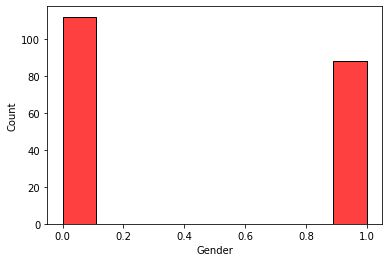

In [16]:
sns.histplot(df['Gender'],color='red')

<AxesSubplot:xlabel='Age', ylabel='Count'>

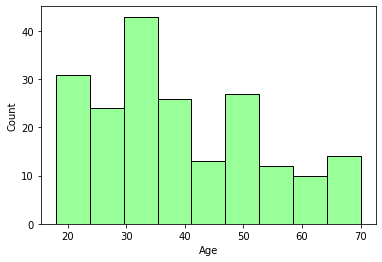

In [17]:
sns.histplot(df['Age'],color='lime',alpha=0.4)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Count'>

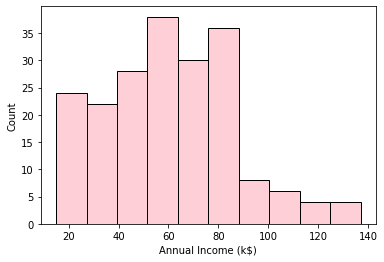

In [18]:
sns.histplot(df['Annual Income (k$)'],color='Pink')

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Count'>

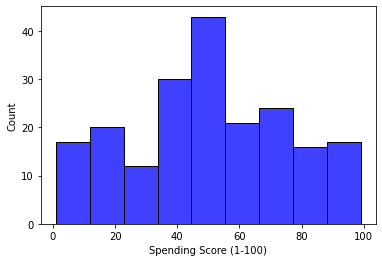

In [19]:
sns.histplot(df['Spending Score (1-100)'],color='blue')

 Box Plot for detecting Outlier

<AxesSubplot:xlabel='Age'>

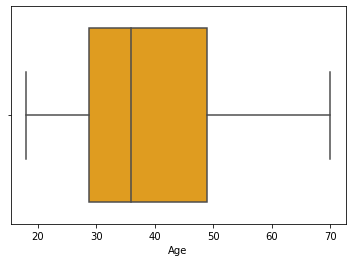

In [20]:
sns.boxplot(x=df['Age'],color='orange')

using this boxplot we can conclude that maximum of ages are lying between 34 to 38 and min age is 18 and maximum age is 70

<AxesSubplot:xlabel='Annual Income (k$)'>

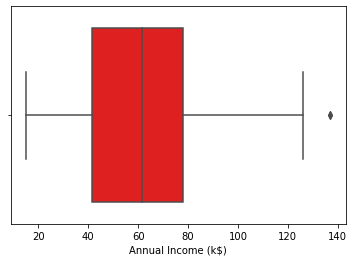

In [21]:
sns.boxplot(x=df['Annual Income (k$)'],color='red')

here median is around 60 we know median is measure of central tendency and hence average salary is $60

<AxesSubplot:xlabel='Spending Score (1-100)'>

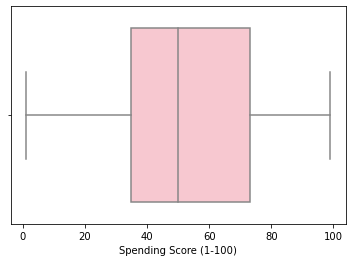

In [22]:
sns.boxplot(x=df['Spending Score (1-100)'],color='pink')

we can conclude that maximum number of people having Spending Score of 50 and amx score 99 and min score 1

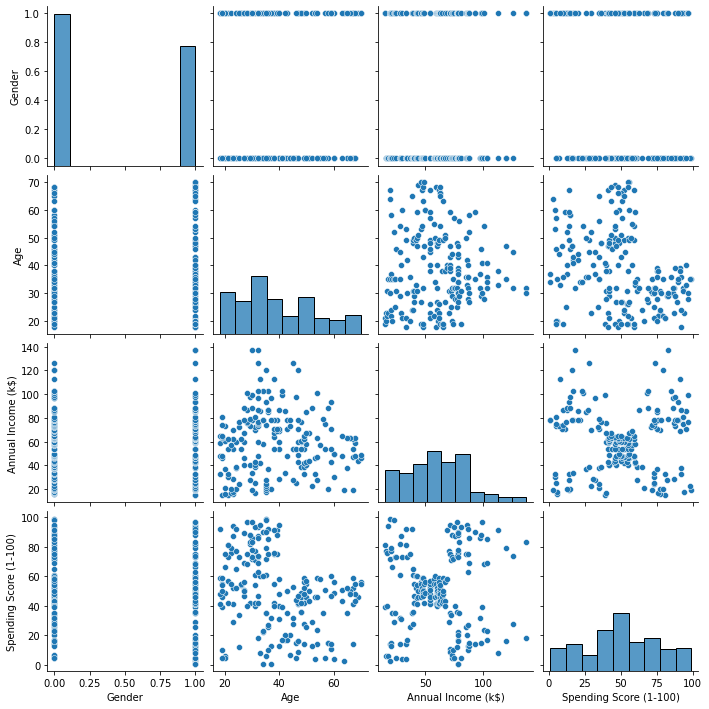

In [23]:
sns.pairplot(df)

here what i concluded is that i got cluster if i plotted scatter plot between AnnualIncome and Spending_Score here we can see 5 clusters

In [24]:
# let do data distribution using gender wise

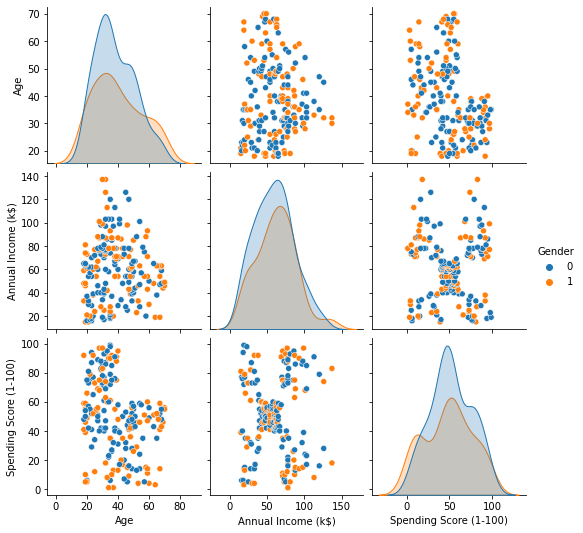

In [25]:
sns.pairplot(df,hue='Gender')

In [26]:
# correlation matrix

In [27]:
cor=df.corr()

<AxesSubplot:>

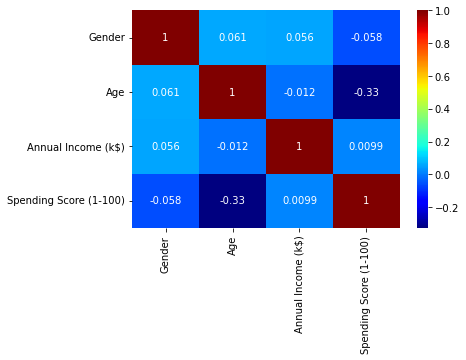

In [28]:
sns.heatmap(cor,annot=True,cmap='jet')

In [29]:
# calulate upper limit and lower limit
upper_limit=df['Annual Income (k$)'].mean() + 3*df['Annual Income (k$)'].std()
lower_limit=df['Annual Income (k$)'].mean() - 3*df['Annual Income (k$)'].std()

In [30]:
print(" upper limit for outlier in Annual Income = ",upper_limit )
print(" max of Annual Income =",df['Annual Income (k$)'].max())
print(" lower limit for outlier in Annual Income = ",lower_limit )
print(" min of Annual Income =",df['Annual Income (k$)'].min())

 upper limit for outlier in Annual Income =  139.35416349581376
 max of Annual Income = 137
 lower limit for outlier in Annual Income =  -18.23416349581376
 min of Annual Income = 15


here we can see max value of Annual Income is 137 and min is 15 which lies in range (-18,139) so no outlier detected

In [31]:
df[(df['Annual Income (k$)']>139) | (df['Annual Income (k$)']<-18)]

,Gender,Age,Annual Income (k$),Spending Score (1-100)


In [32]:
# calulate upper limit and lower limit
upper_limit=df['Spending Score (1-100)'].mean() + 3*df['Spending Score (1-100)'].std()
lower_limit=df['Spending Score (1-100)'].mean() - 3*df['Spending Score (1-100)'].std()

In [33]:
print(upper_limit,lower_limit)

127.67056500511049 -27.270565005110484


here in Spending Score (1-100) there is no outlier

now no outliers are there so we can procedd by feature_scaling for which we are using Normalization

In [34]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
scaler=MinMaxScaler()
scaled_df=scaler.fit_transform(df)

In [35]:
scaled_df

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00819672, 0.05102041],
       [0.        , 0.09615385, 0.00819672, 0.7755102 ],
       [0.        , 0.25      , 0.01639344, 0.39795918],
       [0.        , 0.07692308, 0.01639344, 0.76530612],
       [0.        , 0.32692308, 0.02459016, 0.05102041],
       [0.        , 0.09615385, 0.02459016, 0.94897959],
       [1.        , 0.88461538, 0.03278689, 0.02040816],
       [0.        , 0.23076923, 0.03278689, 0.7244898 ],
       [1.        , 0.94230769, 0.03278689, 0.13265306],
       [0.        , 0.32692308, 0.03278689, 1.        ],
       [0.        , 0.76923077, 0.04098361, 0.14285714],
       [0.        , 0.11538462, 0.04098361, 0.7755102 ],
       [1.        , 0.36538462, 0.04098361, 0.12244898],
       [1.        , 0.07692308, 0.04098361, 0.79591837],
       [0.        , 0.32692308, 0.04918033, 0.34693878],
       [1.        , 0.03846154,

In [36]:
scaled_data=pd.DataFrame(scaled_df,columns=df.columns)

In [37]:
scaled_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008197,0.051020
3,0.0,0.096154,0.008197,0.775510
4,0.0,0.250000,0.016393,0.397959


In [38]:
scaled_data.corr()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,0.060867,0.056410,-0.058109
Age,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),-0.058109,-0.327227,0.009903,1.000000


<AxesSubplot:>

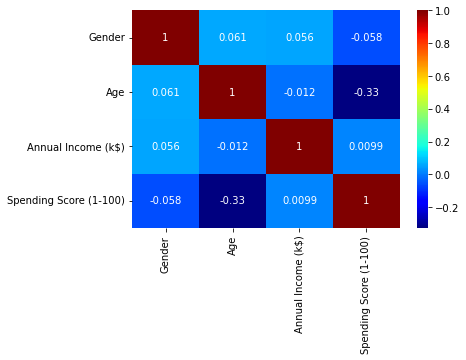

In [39]:
sns.heatmap(scaled_data.corr(),annot=True,cmap='jet')

1.here we can see Annual Incomea and Spending Score having positive correlation coefficient and 

2.age and annual income having negatively correlation coefficient

In [40]:
# analyzing data based on Annual Income and Spending Score (1-100)


In [41]:
x1=df[['Annual Income (k$)','Spending Score (1-100)']]


finding suitable value of K using Elbow method so that we can apply KMean Clustering algorithm
wcss= with in cluster sum of squared distance 

In [42]:
wcss=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42,)
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)


C:\Users\91900\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [43]:
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37233.81451071002,
 30259.657207285458,
 25011.839349156595,
 21850.16528258562,
 19672.07284901432,
 17887.084456628654,
 15917.60968942787,
 14312.668609168613,
 12802.791660300483]

Text(0.5, 1.0, 'The Elbow Point Graph')

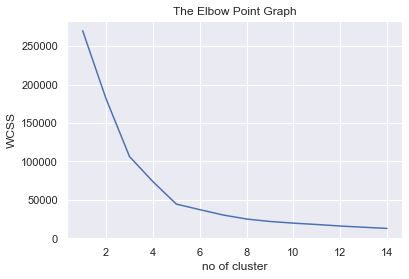

In [44]:
sns.set()
plt.plot(range(1,15),wcss)
plt.xlabel('no of cluster')
plt.ylabel('WCSS')
plt.title('The Elbow Point Graph')

here in elbow curve we can see at elbow value of K is equal to 5
so optimal value of K=5 for KMeans clustering algorithm we are considering K vlaue as 5
here keep one thing in mind that choose that value of K from elbow curve after that ther won't we sudden change in K value, graph will become normal

In [45]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)
y1=kmeans.fit_predict(x1)
print(y1)



[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


to check performance of clustering model we use silhouette score

In [46]:
from sklearn.metrics import silhouette_score
silhouette_score(x1,y1)

0.553931997444648

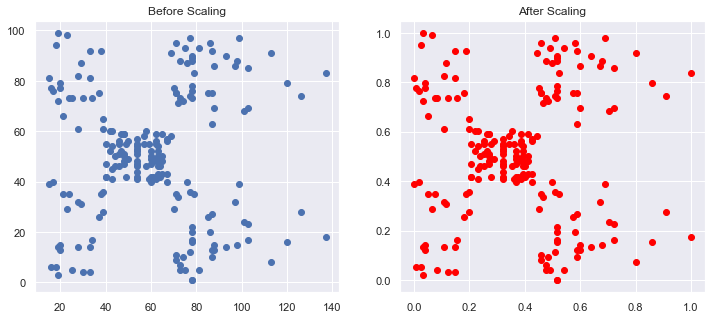

In [47]:
ig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
#before scalinh
ax1.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
ax1.set_title("Before Scaling")
# after scaling
ax2.scatter(scaled_data['Annual Income (k$)'], scaled_data['Spending Score (1-100)'],color='red')
ax2.set_title("After Scaling")
plt.show()

In [48]:
kmeans.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

In [49]:
x1['Clusters']=y1


C:\Users\91900\AppData\Local\Temp/ipykernel_1648/4044180223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1['Clusters']=y1


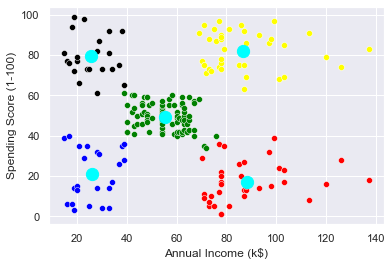

In [50]:
df1=x1[x1['Clusters']==0]
df2=x1[x1['Clusters']==1]
df3=x1[x1['Clusters']==2]
df4=x1[x1['Clusters']==3]
df5=x1[x1['Clusters']==4]
sns.scatterplot(x=df1['Annual Income (k$)'],y=df1['Spending Score (1-100)'],color='red')
sns.scatterplot(x=df2['Annual Income (k$)'],y=df2['Spending Score (1-100)'],color='green')
sns.scatterplot(x=df3['Annual Income (k$)'],y=df3['Spending Score (1-100)'],color='yellow')
sns.scatterplot(x=df4['Annual Income (k$)'],y=df4['Spending Score (1-100)'],color='black')
sns.scatterplot(x=df5['Annual Income (k$)'],y=df5['Spending Score (1-100)'],color='blue')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=150, c='cyan', label='Centroids')

C:\Users\91900\AppData\Local\Temp/ipykernel_1648/2446802349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1['Clusters'] = y1


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

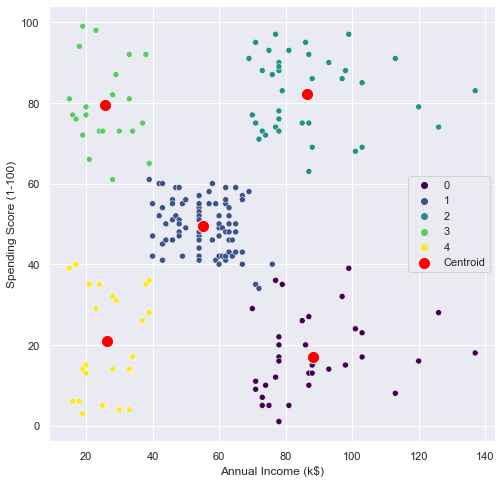

In [51]:
x1['Clusters'] = y1
plt.figure(figsize=(8,8))
sns.scatterplot(x="Annual Income (k$)",y="Spending Score (1-100)",hue = 'Clusters',  data=x1, palette='viridis')
sns.scatterplot(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],s=150,color='red',label='Centroid')

# Information that we extracted from each cluster

Cluster 0 : those Customers having low Spending Score and High Annual Income

Cluster 1 In this Cluster Customers having average Annual Income and avg Spending Score

Cluster 2 Customers having high Annual Income and High Spending Score

Cluster 3 Customers having low Annual Income and High Spending Score

Cluster 4 Customer having low Annual Income and Low Spending Score


now Analyzing Spending Score and Age

In [52]:
x2=scaled_data[['Age','Spending Score (1-100)']]
x2.head()


,Age,Spending Score (1-100)
0,0.019231,0.387755
1,0.057692,0.816327
2,0.038462,0.051020
3,0.096154,0.775510
4,0.250000,0.397959


finding suitable value of K using elbow method

In [53]:
wcss1=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x2)
    wcss1.append(kmeans.inertia_)
print(wcss)

C:\Users\91900\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[269981.28000000014, 181363.59595959607, 106348.37306211119, 73679.78903948837, 44448.45544793369, 37233.81451071002, 30259.657207285458, 25011.839349156595, 21850.16528258562, 19672.07284901432, 17887.084456628654, 15917.60968942787, 14312.668609168613, 12802.791660300483]


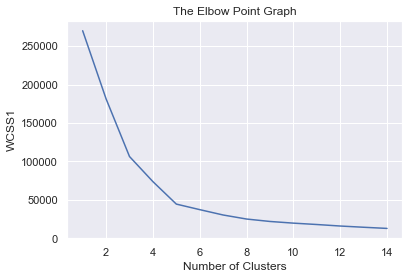

In [54]:
plt.plot(range(1,15),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS1')
plt.show()

In [55]:
kmeans=KMeans(n_clusters=2,init='k-means++',random_state=42)
y2=kmeans.fit_predict(x2)
print(y2)

[1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0
 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0
 1 0 1 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


In [56]:
silhouette_score(x2[['Age','Spending Score (1-100)']],y2)

0.47252865228696783

In [57]:
x2['Clusters']=y2

C:\Users\91900\AppData\Local\Temp/ipykernel_1648/447791785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x2['Clusters']=y2


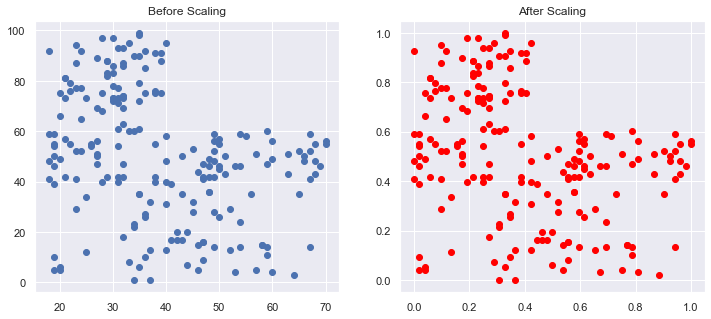

In [58]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
#before scalinh
ax1.scatter(df['Age'], df['Spending Score (1-100)'])
ax1.set_title("Before Scaling")
# after scaling
ax2.scatter(scaled_data['Age'], scaled_data['Spending Score (1-100)'],color='red')
ax2.set_title("After Scaling")
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

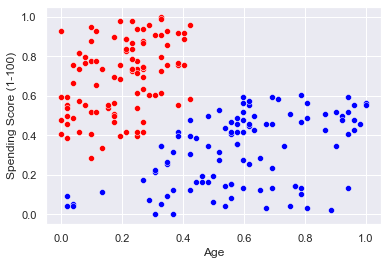

In [59]:
df11=x2[x2['Clusters']==0]
df22=x2[x2['Clusters']==1]
sns.scatterplot(x=df11['Age'],y=df11['Spending Score (1-100)'],color='blue')
sns.scatterplot(x=df22['Age'],y=df22['Spending Score (1-100)'],color='red')



In [60]:
x2.head()

,Age,Spending Score (1-100),Clusters
0,0.019231,0.387755,1
1,0.057692,0.816327,1
2,0.038462,0.051020,0
3,0.096154,0.775510,1
4,0.250000,0.397959,1


<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

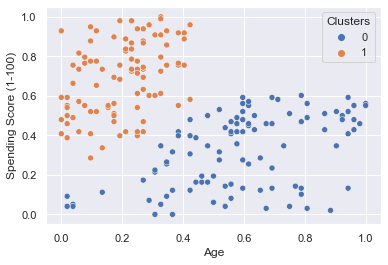

In [61]:
sns.scatterplot(x=x2['Age'],y=x2['Spending Score (1-100)'],hue=x2['Clusters'])

Cluster 0  People having age above 40 having Spending_score  in range lower to average

Cluster 1 People having age below 40 and Spending_score in range  average to high 

# Analyzing Using Hierachical Clustering

In [62]:
import scipy.cluster.hierarchy as shc

analyzing using Annual Income and Spending_score

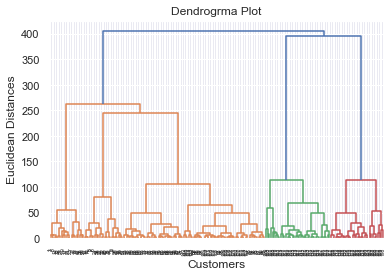

In [63]:
dendro = shc.dendrogram(shc.linkage(x1[['Annual Income (k$)','Spending Score (1-100)']], method="ward"))  
plt.title("Dendrogrma Plot")  
plt.ylabel("Euclidean Distances")  
plt.xlabel("Customers")  
plt.show() 

In [74]:
# train the Hierachical model on training data using agglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
ac=AgglomerativeClustering(affinity='euclidean', linkage='ward')
y_pred=ac.fit_predict(x1[['Annual Income (k$)','Spending Score (1-100)']])
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [65]:
x1['clus']=y_pred
x1.head()

,Annual Income (k$),Spending Score (1-100),Clusters,clus
0,15,39,4,1
1,15,81,3,1
2,16,6,4,1
3,16,77,3,1
4,17,40,4,1


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

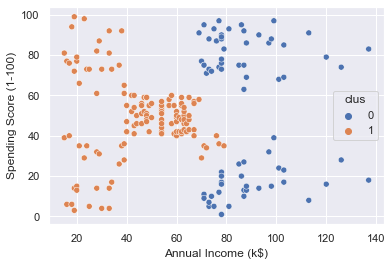

In [66]:
sns.scatterplot(x=x1['Annual Income (k$)'],y=x1['Spending Score (1-100)'],hue=x1['clus'])

In [75]:
silhouette_score(x1[['Annual Income (k$)','Spending Score (1-100)']],y_pred)


0.36706444723912895

Analysis for Age and Spending_score

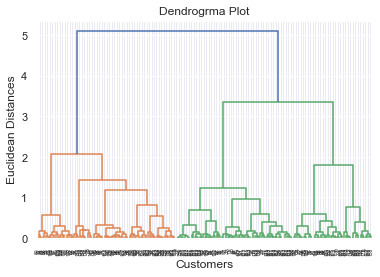

In [76]:
dendro = shc.dendrogram(shc.linkage(x2[['Age','Spending Score (1-100)']] , method="ward"))  
plt.title("Dendrogrma Plot")  
plt.ylabel("Euclidean Distances")  
plt.xlabel("Customers")  
plt.show()

In [91]:
clstr=AgglomerativeClustering(affinity='euclidean',linkage='ward')
y2_predi=clstr.fit_predict(x2)


<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

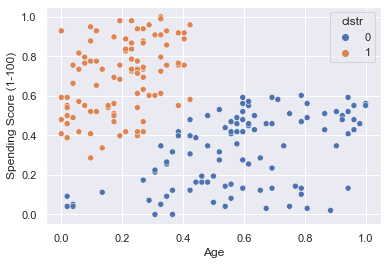

In [92]:
x2['clstr']=y2_predi
sns.scatterplot(x=x2['Age'],y=x2['Spending Score (1-100)'],hue=x2['clstr'])

cluster 0 customers having age>40 and having low spending score


cluster 1 customers having age<=40 and having high Spending Score

In [93]:
silhouette_score(x2[['Age','Spending Score (1-100)']],y2_predi)

0.47252865228696783

Cluster 0 age above 40 spending_score is between low to medium range

Cluster 1 age below 40 spending_score is between low to high but maximum data points are towards high  value of Spending_score

here we got silhouette score is more in KMean_clustering as compare to Hierarchical Clustering

In [89]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=3,min_samples=4)
y_predic=dbscan.fit_predict(x1[['Annual Income (k$)','Spending Score (1-100)']])
y_predic
x1['y_predic']=list(y_predic)
y_predic


array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0,  0,  0,  0, -1, -1,  0, -1,  0, -1,  0,  0,
       -1,  0, -1, -1,  0, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  2,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  2,
        3,  3, -1,  3, -1, -1,  4, -1, -1, -1,  4,  5,  4, -1,  4,  5, -1,
        5,  4, -1,  4,  5, -1, -1,  6, -1, -1, -1,  7, -1,  6, -1,  6, -1,
        7, -1,  6, -1,  7, -1,  7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        8, -1,  8, -1,  8, -1,  8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

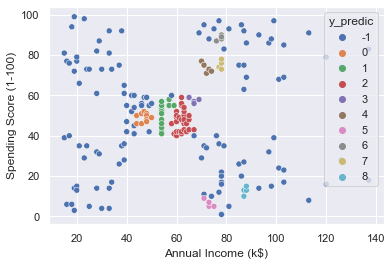

In [87]:
sns.scatterplot(x=x1['Annual Income (k$)'],y=x1['Spending Score (1-100)'],hue=x1['y_predic'],palette='deep')

In [82]:
silhouette_score(x1[['Annual Income (k$)','Spending Score (1-100)']],y_predic)

-0.1908319132560097

here i got negative silhouette_score it means model is not good